In [123]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from collections import Counter

In [124]:
class DataOperations():
    '''
    DataOperations Class read and analyze the given data

    Parameters : 
    data : default = []
    Data path or data itself. It can be pandas DataFrame or numpy array or a string for the data path.

    '''

    def __init__(self, data=[]):
        self.data = data
    
        def read_data():
            '''

            Read the data and return as a pandas DataFrame. Check the data types if data is not given generate random data. 
            If data is string and data is csv or json then read as pandas dataframe.
            If data is numpy array then read as pandas dataframe.

            '''
            # If data is not given, define limits of the random data
            DATA_COUNT = 50
            MIN_POINT = 0
            MAX_POINT = 100

            # If the data is not given create a random data
            if isinstance(self.data, list) and len(self.data) == 0:
                self.data = np.random.randint(MIN_POINT, MAX_POINT, size = DATA_COUNT)
                self.data = pd.DataFrame(self.data)

            # if data type numpy array convert it to pandas dataframe
            elif isinstance(self.data, np.ndarray):
                self.data = pd.DataFrame(self.data)

            # else if the given data is string read as pandas dataframe
            elif isinstance(self.data, str):

                # if data is csv, read with pandas.read_csv 
                if self.data.endswith(".csv"): 
                    try:
                        self.data = pd.read_csv(self.data)
                    except:
                        print("Data could not read")
                
                # else if data is json, read with pandas.read_json
                elif self.data.endswith("json"):
                    try:
                        self.data = pd.read_json(self.data)
                    except:
                        print("Data could not read")

            # else if data type is pandas dataframe do nothing
            elif isinstance(self.data, pd.DataFrame):
                pass
            
            # if the data type is not numpy array, pandas dataframe, csv or json raise exception
            else:
                raise Exception("Undefined Data Type")
        
        read_data()

    def analyze_data(self):

        '''

        Print out the data information and data statistics.
        Draw scatter plots for numerical data and bar plots for categorical data.
        
        '''
        # Print the data informations such as standard deviation, mean or nan values
        print("Data\n", self.data.head(), "\n")
        print("Data Info\n", self.data.info(), "\n")
        print("Data Describe\n", self.data.describe())
        
        # Define numeric and categoric columns
        numeric_data = self.data.select_dtypes(exclude = ['object'])
        categoric_data = self.data.select_dtypes(include =['object'])
        num_cols = list(numeric_data.columns)
        cat_cols = list(categoric_data.columns)

        # Plot scatter graphs for numeric columns
        for idx, col in enumerate(num_cols):
            try:
                plt.scatter(numeric_data.loc[:,num_cols[idx]], numeric_data.loc[:,num_cols[idx+1]])
                plt.title(f"{num_cols[idx]} vs {num_cols[idx+1]} Scatter Plot")
                plt.show()
            except:
                pass
       
       # Plot Bar graphs for columns which are including string values (first 5 value)
        for col in cat_cols:
            categoric_data[col].value_counts()[:5].plot(kind='barh', title = col + " Bar plot")
            

In [125]:
# dictionary of lists
dict = {'name':["A","B","C","D","A","D","E","B","G","G","G","T"],
        'degree': [1,2,3,4,1,2,3,4,1,2,3,4],
        'class': [7,8,9,10,7,8,9,10,7,8,9,10],
        'score':[90, 40, 80, 98,90, 40, 80, 98,90, 40, 80, 98]}

# Sample pandas data
#data = pd.DataFrame(dict)

In [126]:
# sample numpy data
data = np.array([[ 78,  23,  41,  66],
              [ 109,  167,  41,  28],
              [ 187, 22, 76, 88]])

In [127]:
# sample string for csv
#data = r"WineQT.csv"

In [128]:
# sample string for json data
#data = r"iris.json"

Data
      0    1   2   3
0   78   23  41  66
1  109  167  41  28
2  187   22  76  88 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3 non-null      int32
 1   1       3 non-null      int32
 2   2       3 non-null      int32
 3   3       3 non-null      int32
dtypes: int32(4)
memory usage: 176.0 bytes
Data Info
 None 

Data Describe
                 0           1          2          3
count    3.000000    3.000000   3.000000   3.000000
mean   124.666667   70.666667  52.666667  60.666667
std     56.163452   83.428612  20.207259  30.353473
min     78.000000   22.000000  41.000000  28.000000
25%     93.500000   22.500000  41.000000  47.000000
50%    109.000000   23.000000  41.000000  66.000000
75%    148.000000   95.000000  58.500000  77.000000
max    187.000000  167.000000  76.000000  88.000000


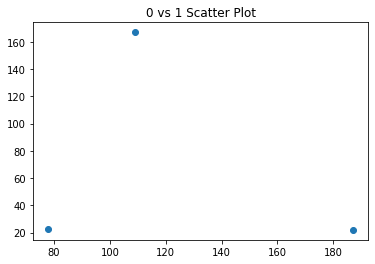

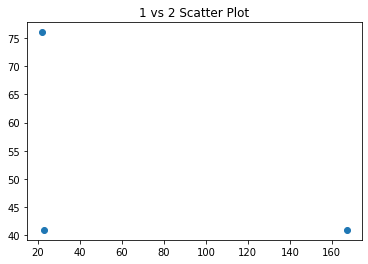

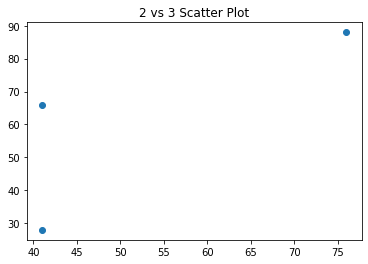

In [129]:
data_op = DataOperations(data)
data_op.analyze_data()